In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPool2D,BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import regularizers

In [325]:
traindir = "./dataset_final/Train"
validdir = "./dataset_final/Validation"
os.listdir(traindir)

['Male', 'Female']

In [326]:
# def show_random_images(dir):
#     plt.figure(figsize=(12,7))
#     for i in range(10):
#         plt.subplot(2,5,i+1)
#         img = random.choice(os.listdir(dir))
#         img = load_img(os.path.join(dir,img))
#         plt.subplots_adjust(hspace=0.2)
#         x =dir.split("/")[-1]
#         if x == "male":
#             plt.suptitle("Male Images",fontsize=15)
#         else:
#             plt.suptitle("Female Images",fontsize=15)
#         plt.imshow(img)
#     plt.tight_layout()

In [327]:
# show_random_images(traindir+"/male")

In [328]:
# show_random_images(traindir+"/female")

In [329]:
def show_image(dir):
    plt.figure(figsize=(12,7))
    img = load_img(os.path.join(dir))
    plt.imshow(img)

In [330]:
height = 120
width = 120
train_datagen =  ImageDataGenerator(rescale = 1/255.0,rotation_range=45,height_shift_range=0.2,shear_range=0.2,
                              zoom_range=0.2,validation_split=0.2,horizontal_flip=True)

train_data = train_datagen.flow_from_directory(directory = traindir,target_size=(height,width),
                                               class_mode = "categorical",batch_size=32,subset="training")

val_datagen = ImageDataGenerator(rescale = 1/255.0)

val_data = train_datagen.flow_from_directory(directory = traindir,target_size=(height,width),
                                               class_mode = "categorical",batch_size=32,subset="validation")

Found 128000 images belonging to 2 classes.
Found 32000 images belonging to 2 classes.


In [340]:
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(height,width,3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(2,activation = "sigmoid"))

In [1]:
model.compile(optimizer=Adam(lr=0.001),loss = "categorical_crossentropy",metrics =["accuracy"])
model.summary()

NameError: name 'model' is not defined

In [342]:
# checkpoint = ModelCheckpoint("Gender.h5",monitor = "val_accuracy",save_best_only = True,verbose=1)
# earlystop = EarlyStopping(monitor='val_acc',patience=5,verbose=1)

In [343]:
# train_data.samples
batch_size = 32
len(train_data)// batch_size

125

In [344]:
history = model.fit_generator(train_data,
                              steps_per_epoch = len(train_data)// batch_size,
                              epochs=30,
                              validation_data = val_data,
                              validation_steps = len(val_data)//batch_size,
#                               callbacks = [checkpoint,earlystop],
                              verbose=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
125/125 [==============================] - 36s 283ms/step - loss: 0.6831 - accuracy: 0.5986 - val_loss: 0.6453 - val_accuracy: 0.6179
Epoch 2/30
125/125 [==============================] - 34s 271ms/step - loss: 0.6431 - accuracy: 0.6187 - val_loss: 0.6121 - val_accuracy: 0.6784
Epoch 3/30
125/125 [==============================] - 33s 266ms/step - loss: 0.5960 - accuracy: 0.6758 - val_loss: 0.5487 - val_accuracy: 0.7288
Epoch 4/30
125/125 [==============================] - 34s 269ms/step - loss: 0.5373 - accuracy: 0.7318 - val_loss: 0.5065 - val_accuracy: 0.7419
Epoch 5/30
125/125 [==============================] - 34s 270ms/step - loss: 0.5033 - accuracy: 0.7567 - val_loss: 0.4803 - val_accuracy: 0.7702
Epoch 6/30
125/125 [==============================] - 34s 270ms/step - loss: 0.4632 - accuracy: 0.7790 - val_loss: 0.4404 - val_accuracy: 0.7974
Epoch 7/30
125/125 [==============================] - 34s 273ms/step - loss: 0.4208 - accuracy: 0.8052 - val_loss: 0.4005 - val_ac

In [345]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    
    print(i, layer.name, layer.output.shape)

0 conv2d_345 (None, 118, 118, 8)
1 max_pooling2d_136 (None, 59, 59, 8)
2 conv2d_346 (None, 57, 57, 16)
3 conv2d_347 (None, 55, 55, 16)
4 max_pooling2d_137 (None, 27, 27, 16)
5 conv2d_348 (None, 25, 25, 32)
6 conv2d_349 (None, 23, 23, 32)
7 conv2d_350 (None, 21, 21, 32)
8 max_pooling2d_138 (None, 10, 10, 32)
9 conv2d_351 (None, 8, 8, 64)
10 conv2d_352 (None, 6, 6, 64)
11 max_pooling2d_139 (None, 3, 3, 64)
12 flatten_42 (None, 576)
13 dense_84 (None, 64)
14 dense_85 (None, 2)


In [346]:
from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers[:12]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [347]:
# This func will compute layerwise average activations and the maximum of these means
def compute_avg_activation(activations,normalize=False):
    nb_layers = len(activations)
    layers_means = []
    lambdas = []
    for l in range(nb_layers):
        layer_output = activations[l][0]
        layer_mean_of_activs = [] # Stores average activations per layer
        for i in range (layer_output.shape[2]): # loop over each filter (3rd dimention) 
            filter_mean_activ = layer_output[:,:,i].mean() # Get the mean (A hat, from the paper)
            layer_mean_of_activs.append(filter_mean_activ)
        layer_max_activ = max(layer_mean_of_activs) # Get max (This is lambda of the layer)
        lambdas.append(layer_max_activ)
        if(normalize):
            layer_mean_of_activs = [x/layer_max_activ for x in layer_mean_of_activs] # Normalize
        layers_means.append(layer_mean_of_activs) # This is lambda prime of layer
    return layers_means, lambdas

In [348]:
from tqdm import tqdm

In [349]:
# Dataset should be for one target ethnicity 
def compute_lambdas(test_samples):
    lambdas = []
    for i in tqdm(range(len(test_samples))):
        image = test_samples[i]
        image = np.reshape(image,[1,120,120,3])
        all_outputs = activation_model.predict(image)
        means,layers_lambdas = compute_avg_activation(all_outputs,True)
        lambdas.append(layers_lambdas)
    lambdas = np.array(lambdas)
    lambdas_max = np.max(lambdas,0) # store the max per layer
    lambdas_min = np.min(lambdas,0) # store the min per layer
    return lambdas_max,lambdas_min

In [350]:
val_data_gray = train_datagen.flow_from_directory(directory = traindir,target_size=(height,width),
                                               color_mode='grayscale',
                                               class_mode = "categorical",batch_size=32,subset="validation")


Found 32000 images belonging to 2 classes.


In [351]:
def color_grayscale_arr(arr, color='white'):
    """Converts grayscale image to either red or green"""
    assert arr.ndim == 3
    dtype = arr.dtype
    h, w,_ = arr.shape
    arr = np.reshape(arr, [h, w, 1])
    if (color=='red'):
        arr = np.concatenate([arr,
                          np.zeros((h, w, 2), dtype=dtype)], axis=2)
    elif (color=='green'):
        arr = np.concatenate([np.zeros((h, w, 1), dtype=dtype),
                          arr,
                          np.zeros((h, w, 1), dtype=dtype)], axis=2)
    elif (color=='blue'):
        arr = np.concatenate([np.zeros((h, w, 1), dtype=dtype),
                          np.zeros((h, w, 1), dtype=dtype), 
                         arr], axis=2)
    elif (color=='white'):
        arr = np.concatenate([arr,
                          arr, 
                         arr], axis=2)
        
    return arr

In [370]:
def normalize_im(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalized data
    """
    return np.array((x - np.min(x)) / (np.max(x) - np.min(x)))

In [371]:
threshold_pictures = 100

In [372]:
gray_samples = []
count = 0
for gray_sample in val_data_gray:
    my_image = gray_sample[0][0]
    my_image = color_grayscale_arr(my_image,'white')
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preprocess_input(my_image)
    my_image = normalize_im(my_image)
    gray_samples.append(my_image)
    count = count + 1
    if(count == threshold_pictures):
        break

In [373]:
green_samples = []
count = 0
for gray_sample in val_data_gray:
    my_image = gray_sample[0][0]
    my_image = color_grayscale_arr(my_image,'green')
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preprocess_input(my_image)
    my_image = normalize_im(my_image)
    green_samples.append(my_image)
    count = count + 1
    if(count == threshold_pictures):
        break

In [374]:
blue_samples = []
count = 0
for gray_sample in val_data_gray:
    my_image = gray_sample[0][0]
    my_image = color_grayscale_arr(my_image,'blue')
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preprocess_input(my_image)
    my_image = normalize_im(my_image)
    blue_samples.append(my_image)
    count = count + 1
    if(count == threshold_pictures):
        break

In [375]:
red_samples = []
count = 0
for gray_sample in val_data_gray:
    my_image = gray_sample[0][0]
    my_image = color_grayscale_arr(my_image,'red')
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preprocess_input(my_image)
    my_image = normalize_im(my_image)
    red_samples.append(my_image)
    count = count + 1
    if(count == threshold_pictures):
        break

In [376]:
colored_samples = []
count = 0
for sample in val_data:
    my_image = sample[0][0]
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preprocess_input(my_image)
    my_image = normalize_im(my_image)
    colored_samples.append(my_image)
    count = count + 1
    if(count == threshold_pictures):
        break

In [377]:
lambdas_max_gray_samples, lambdas_min_gray_samples = compute_lambdas(gray_samples)

100%|██████████| 100/100 [00:04<00:00, 21.18it/s]


In [378]:
lambdas_max_colored_samples, lambdas_min_colored_samples = compute_lambdas(colored_samples)

100%|██████████| 100/100 [00:04<00:00, 22.30it/s]


In [379]:
lambdas_max_red_samples, lambdas_min_red_samples = compute_lambdas(red_samples)

100%|██████████| 100/100 [00:04<00:00, 22.52it/s]


In [380]:
lambdas_max_blue_samples, lambdas_min_blue_samples = compute_lambdas(blue_samples)

100%|██████████| 100/100 [00:04<00:00, 22.55it/s]


In [381]:
lambdas_max_green_samples, lambdas_min_green_samples = compute_lambdas(green_samples)

100%|██████████| 100/100 [00:05<00:00, 18.10it/s]


In [382]:
layers = [x for x in range(12)]

In [384]:
from numpy import inf

vals_red = lambdas_max_red_samples/lambdas_min_red_samples
vals_red[vals_red==inf] = 1.0

vals_colored = lambdas_max_colored_samples/lambdas_min_colored_samples
vals_colored[vals_colored==inf] = 1.0

vals_gray = lambdas_max_gray_samples/lambdas_min_gray_samples
vals_gray[vals_gray==inf] = 1.0

vals_green = lambdas_max_green_samples/lambdas_min_green_samples
vals_green[vals_green==inf] = 1.0

vals_blue = lambdas_max_blue_samples/lambdas_min_blue_samples
vals_blue[vals_blue==inf] = 1.0

In [385]:
import numpy as np
from sklearn.preprocessing import normalize

def normal(arr):    
    x = arr
    norm1 = x / np.linalg.norm(x)
    norm2 = normalize(x[:,np.newaxis], axis=0).ravel()
    return norm2


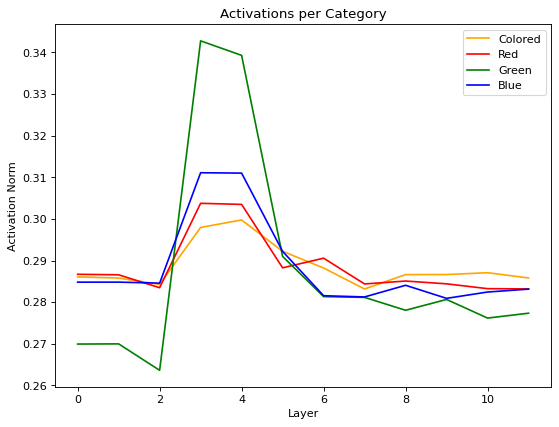

In [386]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

plt.plot(layers, normal(vals_colored),'orange')

plt.plot(layers, normal(vals_red),'red')
plt.plot(layers, normal(vals_green),'green')
plt.plot(layers, normal(vals_blue),'blue')

plt.legend(['Colored',"Red","Green","Blue"])
plt.title('Activations per Category')
plt.xlabel('Layer')
plt.ylabel('Activation Norm')
plt.show()